In [1]:
# Importando as Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from seaborn import load_dataset

import numpy as np

import statsmodels.formula.api as smf

In [2]:
# Versão dos pacotes e do python.
%reload_ext watermark
%watermark --iversions --python

Python implementation: CPython
Python version       : 3.10.11
IPython version      : 8.12.0

statsmodels: 0.14.0
pandas     : 2.0.3
matplotlib : 3.7.1
seaborn    : 0.12.2
numpy      : 1.25.0



# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [3]:
# Tratamento dos Dados e Amostragem.
tips = sns.load_dataset("tips")
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_pct'] = tips['tip'] / tips['net_bill']
tips.drop(['total_bill', 'sex', 'smoker', 'day', 'time', 'size'], axis=1, inplace=True)
tips.head()

,tip,net_bill,tip_pct
0,1.01,15.98,0.063204
1,1.66,8.68,0.191244
2,3.50,17.51,0.199886
3,3.31,20.37,0.162494
4,3.61,20.98,0.172069


In [4]:
# Regressão reg1 ('tip ~ net_bill').
reg1 = smf.ols('tip ~ net_bill',
              data= tips).fit()

# Sumário reg1.
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 03 Jul 2023   Prob (F-statistic):           5.02e-23
Time:                        23:36:59   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 10.48965)

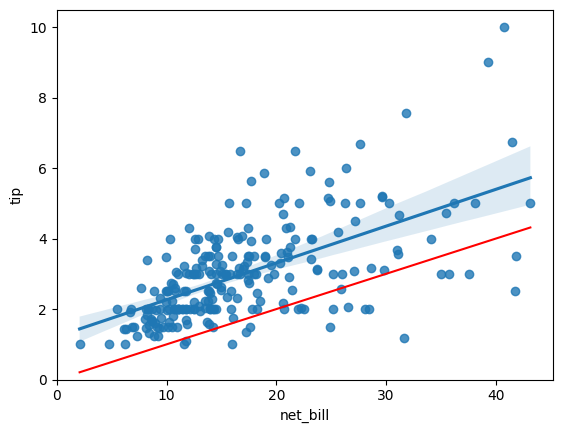

In [5]:
# Gráfico de dispersão 'tip x net_bill'.
sns.regplot(y= 'tip',
            x= 'net_bill',
            data= tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%.
x = np.linspace(tips['net_bill'].min(),
                tips['net_bill'].max(),
                num=100)
y = .1*x

# Plotando a linha dos 10%.
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico.
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [6]:
# Regressão reg2 ('tip_pct ~ net_bill').
reg2 = smf.ols('tip_pct ~ net_bill',
              data= tips).fit()

# Sumário reg2.
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 03 Jul 2023   Prob (F-statistic):           1.52e-06
Time:                        23:36:59   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 1.0)

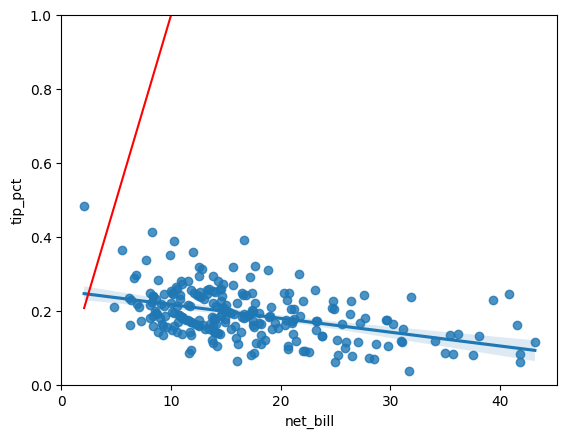

In [7]:
# Gráfico de dispersão 'tip_pct x net_bill'.
sns.regplot(y= 'tip_pct', x= 'net_bill', data= tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%.
x = np.linspace(tips['net_bill'].min(),
                tips['net_bill'].max(),
                num=100)
y = .1*x

# Plotando a linha dos 10%.
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico.
plt.xlim(left = 0)
plt.ylim(bottom = 0, top = 1)

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

### Resposta:

Como podemos ver nos **gráficos acima** e no **código abaixo**. Ocorre uma grande discrepância entre os dois modelos criados.
* No Modelo **'tip ~ net_bill'** é melhor para análise, mostrando uma relação entre a linha dos 10% (Beta) e um R-quadrado maior **(0.33)**.
<br><br>
* Já no Modelo **'tip_pct ~ net_bill'** ocorre uma inconsistência entre a linha dos 10% (Beta), devido ao Beta valer **quase 0** neste Modelo **(-0.006)** e um R-quadrado menor **(0.09)**.
<br><br>
* Para finalizar, entende-se que não é adequado analisarmos o Modelo em relação a **Porcentagem**, verificamos que a correlação entre **'tip_pct'** e **'net_bill'** não são boas.

In [8]:
# Template para Printar Alpha, Beta e R-quadrado.

template = "Alpha, Beta e R-quadrado do Modelo de Regressão '{0}':\n{1}\nR-quadrado   {2:.6f}"

# Print do Template.
print(template.format('tip ~ net_bill',reg1.params,reg1.rsquared))
print()
print(template.format('tip_pct ~ net_bill',reg2.params,reg2.rsquared))

Alpha, Beta e R-quadrado do Modelo de Regressão 'tip ~ net_bill':
Intercept    1.330698
net_bill     0.099334
dtype: float64
R-quadrado   0.332541

Alpha, Beta e R-quadrado do Modelo de Regressão 'tip_pct ~ net_bill':
Intercept    0.305297
net_bill    -0.006146
dtype: float64
R-quadrado   0.091291


### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [9]:
# valor predito pred para tip_pct ('.fittedvalues').
tips['pred_tip_pct'] = reg2.fittedvalues

# valor predito para tip como tip_pct * net_bill
tips['pred_tip'] = tips['pred_tip_pct'] * tips['net_bill']

# Amostragem de Dados.
tips.head()

,tip,net_bill,tip_pct,pred_tip_pct,pred_tip
0,1.01,15.98,0.063204,0.207087,3.309254
1,1.66,8.68,0.191244,0.251951,2.186938
2,3.50,17.51,0.199886,0.197684,3.461450
3,3.31,20.37,0.162494,0.180107,3.668785
4,3.61,20.98,0.172069,0.176358,3.699998


In [10]:
# Regressão reg3 ('pred_tip ~ net_bill').
reg3 = smf.ols('pred_tip ~ net_bill', data= tips).fit()

# Sumário reg3.
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               pred_tip   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     99.74
Date:                Mon, 03 Jul 2023   Prob (F-statistic):           6.88e-20
Time:                        23:37:00   Log-Likelihood:                -192.63
No. Observations:                 244   AIC:                             389.3
Df Residuals:                     242   BIC:                             396.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2819      0.079     28.704      0.000       2.125       2.438
net_bill       0.0427      0.004      9.987      0.000       0.034       0.051
==============================================================================
Omnibus:                       97.034   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.025
Skew:                          -1.782   Prob(JB):                     5.74e-62
Kurtosis:                       6.878   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 4.84854218405547)

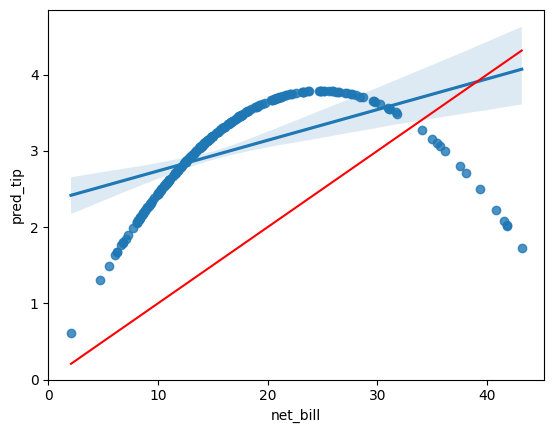

In [11]:
# Gráfico de dispersão 'pred_tip x net_bill'.
sns.regplot(y= 'pred_tip',
            x= 'net_bill',
            data= tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%.
x = np.linspace(tips['net_bill'].min(),
                tips['net_bill'].max(),
                num=100)
y = .1*x

# Plotando a linha dos 10%.
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico.
plt.xlim(left = 0)
plt.ylim(bottom = 0)

In [12]:
# Resposta: Vemos que o R² do pred_tip é um pouco menor do que do item 1, ou seja, o R² do item 1 é melhor.
# O Alpha(2.28) aumentou em relação ao item 1 e o Beta do pred_tip (0.04) não segue a linha dos 10%.

print(template.format('tip ~ net_bill',reg1.params,reg1.rsquared))
print()
print(template.format('pred_tip ~ net_bill',reg3.params,reg3.rsquared))

Alpha, Beta e R-quadrado do Modelo de Regressão 'tip ~ net_bill':
Intercept    1.330698
net_bill     0.099334
dtype: float64
R-quadrado   0.332541

Alpha, Beta e R-quadrado do Modelo de Regressão 'pred_tip ~ net_bill':
Intercept    2.281852
net_bill     0.042676
dtype: float64
R-quadrado   0.291852
